Apple and Grapes Concentration

In this project, from 35 images of different concentration of apple and grapes juice, we train a machine learning model to predict the concentration of samples that are not in the training_set. 25 samples were used to train the model randomly, and 10 of the samples were separated before begining the training, to be set as test_set.

1. Get the Average RGB for each sample photo

In [29]:
# import necessary modules
from PIL import Image
import numpy as np
import pandas as pd
import os # file and directories
import matplotlib.pyplot as plt
import copy
import math

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline



Calculating Average RGB of Each Sample and Store Them in DataFrame

In [30]:
folder_name = r'C:\Users\nathan-mekuria\Desktop\Project\DurmusHoca\AppleGrapesJuice\ML_model\Images'

data = []

for image_name in os.listdir(folder_name):
    if image_name.endswith(('jpg')):
        image_path = os.path.join(folder_name, image_name)
        image = Image.open(image_path)

        np_image = np.array(image)
        average_rgb = np_image.mean(axis= (0, 1)) # tuble with 3 features
        data.append([image_name, *average_rgb]) 

df = pd.DataFrame(data, columns= ['Image Name', 'Average R', 'Average G', 'Average B'])
df.reset_index(drop= True, inplace= True)
df.head


<bound method NDFrame.head of    Image Name   Average R   Average G  Average B
0       1.jpg  108.661646  134.038183  46.804389
1      10.jpg   25.931250   19.884031  20.068351
2      11.jpg   42.084115   20.194604  20.402166
3      12.jpg   26.721579   17.307498  17.922117
4      13.jpg   35.599673   20.599031  21.391869
5      14.jpg   27.169760   16.565125  16.659064
6      15.jpg   43.584316   17.232585  15.166021
7      16.jpg   41.562109   22.673778  24.033104
8      17.jpg   84.998277   49.148476  25.092389
9      18.jpg   39.113469   17.983533  17.341224
10     19.jpg   28.582303   20.482339  19.832201
11      2.jpg   31.531814   22.586923  22.796008
12     20.jpg   37.545362   20.517627  20.749058
13     21.jpg   49.859921   24.045765  24.798840
14     22.jpg   87.911371   34.844249  20.640904
15     23.jpg  108.547283   94.126946  37.706653
16     24.jpg   37.424971   20.393974  21.484152
17     25.jpg   55.166728   20.063373  18.897941
18     26.jpg   42.935855   23.639710  

Load the label

In [31]:
label_path = r'C:\Users\nathan-mekuria\Desktop\Project\DurmusHoca\AppleGrapesJuice\ML_model\Images\Label.xlsx'
label = pd.read_excel(label_path)
label.head

<bound method NDFrame.head of       Actual
0   100.0460
1     3.4700
2    54.9584
3    17.8254
4    39.4224
5    31.2460
6    69.8706
7    45.4606
8    90.0896
9    59.3754
10   14.8282
11    0.0000
12   45.1802
13   51.1172
14   83.9286
15   96.8338
16   33.6536
17   65.2202
18   29.3332
19   17.9542
20    7.4116
21   37.6520
22   50.1356
23   13.2612
24   33.0982
25   40.5778
26   80.5606
27   71.7756
28    6.0698
29   25.0194
30   75.0976
31   91.9722
32   43.5238
33   21.3328
34   60.2860>

Merge Data with Label

In [32]:
full_data = pd.concat([df, label], axis= 1)
full_data.head

<bound method NDFrame.head of    Image Name   Average R   Average G  Average B    Actual
0       1.jpg  108.661646  134.038183  46.804389  100.0460
1      10.jpg   25.931250   19.884031  20.068351    3.4700
2      11.jpg   42.084115   20.194604  20.402166   54.9584
3      12.jpg   26.721579   17.307498  17.922117   17.8254
4      13.jpg   35.599673   20.599031  21.391869   39.4224
5      14.jpg   27.169760   16.565125  16.659064   31.2460
6      15.jpg   43.584316   17.232585  15.166021   69.8706
7      16.jpg   41.562109   22.673778  24.033104   45.4606
8      17.jpg   84.998277   49.148476  25.092389   90.0896
9      18.jpg   39.113469   17.983533  17.341224   59.3754
10     19.jpg   28.582303   20.482339  19.832201   14.8282
11      2.jpg   31.531814   22.586923  22.796008    0.0000
12     20.jpg   37.545362   20.517627  20.749058   45.1802
13     21.jpg   49.859921   24.045765  24.798840   51.1172
14     22.jpg   87.911371   34.844249  20.640904   83.9286
15     23.jpg  108.547283 

Spliting Training Set and Test Set

In [33]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[ :test_set_size]
    train_indices = shuffled_indices[test_set_size: ]
    return data.iloc[train_indices], data.iloc[test_indices]

# Split the data
train_set_data, test_set_data = split_train_test(full_data, 0.2)

# Select only numeric features (excluding non-numeric columns)
train_set = train_set_data.select_dtypes(include=[np.number]).iloc[:, :-1]  # Excluding the last column (assumed label)
train_features = train_set.values

# Select numeric labels
train_set_label = train_set_data.select_dtypes(include=[np.number]).iloc[:, -1:]
train_labels = train_set_label.values.reshape(-1, 1)

# Process test set in the same way
test_set = test_set_data.select_dtypes(include=[np.number]).iloc[:, :-1]
test_set_label = test_set_data.select_dtypes(include=[np.number]).iloc[:, -1:]


# modify test_set as well dont forget
print(train_labels[:5])
print(train_features[:5])
print("Type of train_set: ", type(train_set))
print("size of train_set (m): ", len(train_set))

[[45.1802]
 [90.0896]
 [33.6536]
 [59.3754]
 [21.3328]]
[[37.5453624  20.51762733 20.74905773]
 [84.99827663 49.14847624 25.09238928]
 [37.42497076 20.39397353 21.48415205]
 [39.11346889 17.98353327 17.34122403]
 [28.86276786 18.99396046 19.55607143]]
Type of train_set:  <class 'pandas.core.frame.DataFrame'>
size of train_set (m):  28


Visualize the Features

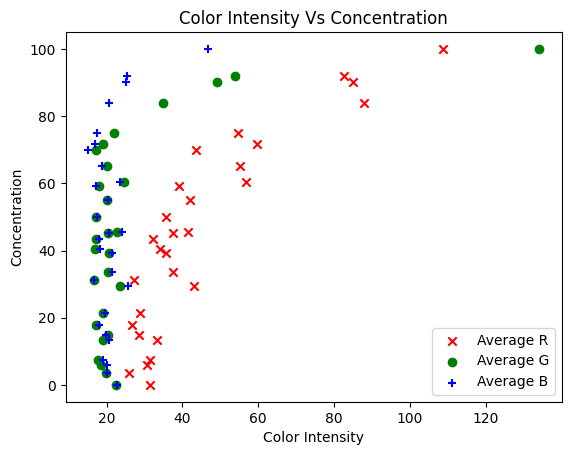

In [34]:
# Create a Scatter Plot for All Features and the Label
# To create red 'x', we used marker= 'x' and c= 'r'
plt.scatter(train_set['Average R'], train_set_label, marker= 'x', c= 'r', label= 'Average R')

plt.scatter(train_set['Average G'], train_set_label, marker= 'o', c= 'g', label= 'Average G')

plt.scatter(train_set['Average B'], train_set_label, marker= '+', c= 'b', label= 'Average B')

plt.title("Color Intensity Vs Concentration")
plt.ylabel("Concentration")
plt.xlabel("Color Intensity")

plt.legend()

plt.show()

Compute Cost Func to Calculate the Total Cost of Using Parameters w and b

In [35]:
def compute_cost(X, y, w, b, *argv):
    """
    Compute cost func for linear regression

    Args:
        X (ndarray) : shape(m, n) Input to the model
        y (ndarray) : shape(m, 1) Label
        w (vector) : shape(1, n) Parameter
        b (scalar) : Parameter

    Returns:
        total_cost (float) : the cost of using the parameter w, and b
    """

    X = np.array(X)
    y = np.array(y)
 #  w = np.array(w).reshape((w.shape[0], 1))  # Ensure w is a column vector

    m, n = X.shape
    total_cost = 0

    f_wb = np.dot(X, w) + b
    cost = (f_wb - y) ** 2

    total_cost =  np.sum(cost) / (2 * m)

    return total_cost
    


Check the Function Using the Training Set

In [36]:
%%capture
m, n = train_set.shape
print("m: ", m, " n: ", n)

w_init = np.zeros(n).reshape(n)
b_init = 0
print(w_init)
cost = compute_cost(train_set, train_set_label, w_init, b_init)
print("Total Cost:", cost)

Gradient Function

In [37]:
def compute_gradient(X, y, w, b):
    """
    Compute gradient of linear regression

    Args:
        X (ndarray (m,n)) : Data input
        y (ndarray (m, )) : Label
        w (vector (, n)) : vector parameter
        b (scalar) : parameter

    Returns:
        dj_dw (vector ( ,n))
        dj_db (scalar)
    """

    m, n = X.shape

    dj_dw = np.zeros((n, ))
    dj_db = 0.

    for i in range(m): # iterate through the example
        err = (np.dot(X[i], w) + b) - y[i]

        for j in range(n):
            dj_dw[j] += err * X[i, j] # derivative

        dj_db += err

    return dj_dw, dj_db

In [38]:
%%capture
tmp_dj_dw, tmp_dj_db = compute_gradient(train_features, train_labels, w_init, b_init)

print(f'dj_db at initial b: {tmp_dj_db}')
print(f'dj_dw at initial w \n {tmp_dj_dw}')

Implementation of Gradiend Descent Function

In [39]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_of_iter):
    """
    Compute gredient descent algorithm

    Args:
        X (ndarray (m, n)) : Data input
        y (ndarray (m, )) : label
        w_in (ndarray (n, )) : Vector parameter
        b_in (scalar) : Parameter
        cost_function : function to calculate cost
        gradient_function : function to calculate gradient
        alpha (float) : learning rate
        num_of_iter (int) : number of iteration

    Returns:
        w (ndarray (n, )) : modified w
        b (scalar) : modified b
    """

    J_history = []
    w = copy.deepcopy(w_in) # avoid altering global w
    b = b_in

    for i in range(num_of_iter):
        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 10000:
            J_history.append(cost_function(X, y, w, b))

        if i % math.ceil(num_of_iter / 10) == 0:
            print(f'{i:4d}\'th iteration cost: {J_history[-1]:8.2f}')

    return w, b, J_history # J_history for graphing

    

Using the Function to Predict the Concentration of the Training Set

In [40]:
%%capture
initial_w = np.zeros_like(w_init)
initial_b = 0.

alpha = 1e-8
iterations = 100000

w_final, b_final, j_history = gradient_descent(train_features, train_labels, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

print(w_init)
m, _ = train_features.shape

for i in range(m):
    prediction = float(np.dot(train_features[i], w_final) + b_final)
    actual = train_labels[i]
    print("Predicted: ", prediction, "      Actual: ", actual)

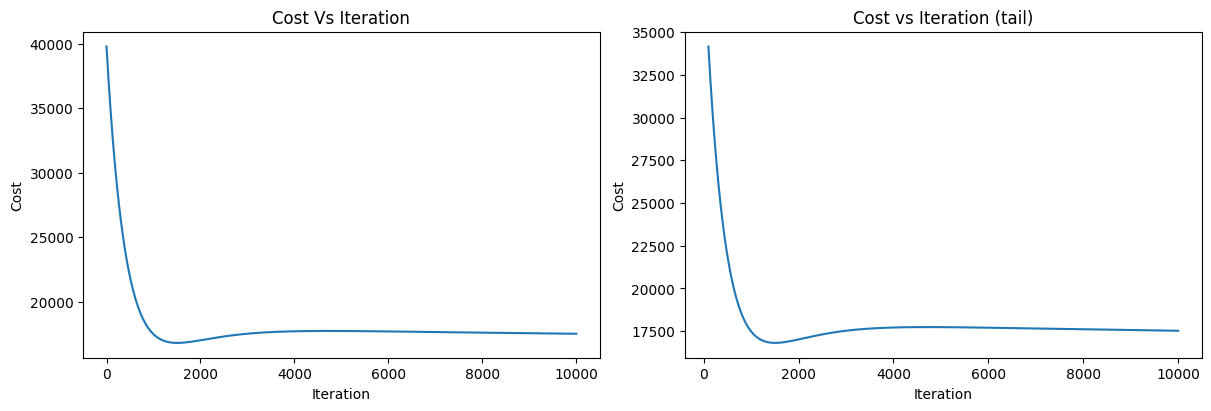

In [45]:
# plot cost versus iteration
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout= True, figsize= (12, 4))
ax1.plot(j_history)
ax2.plot(100 + np.arange(len(j_history[100:])), j_history[100:])

ax1.set_title("Cost Vs Iteration"); ax2.set_title("Cost vs Iteration (tail)")
ax1.set_ylabel("Cost"); ax2.set_ylabel("Cost")
ax1.set_xlabel("Iteration"); ax2.set_xlabel("Iteration")
plt.show()